In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gvar as gv

In [2]:
import h5py
import lsqfit
import h5data_methods


In [3]:
# Constants

#Physical constants
hbarc = 197.3 # MeV fm
a = 0.12

# Pion mass
mpi = 0.1885

# Array of tsep values
tsep_vals = np.arange(3,13,1)

In [4]:
def Ei(n_selec, p):
    Ea = p['E0']
    for l in range(n_selec):
        Ea += p['dE{}'.format(l)]
        
    print(Ea)
    return Ea

In [5]:
# Load data
data = gv.BufferDict()
data['2pt'] = h5data_methods.get_2pt("a12m310_a_avg.h5")
data['2pt_SS'] = data['2pt'][:,:,0]
data['2pt_PS'] = data['2pt'][:,:,1]
data['3pt'] = h5data_methods.get_3pt("a12m310_a_avg.h5", "A3", 3, 13)

gv_avg_data = gv.BufferDict()
gv_avg_data = gv.dataset.avg_data(data)

In [6]:
# Calculate the ratio between 3-point and 2-point data
gv_avg_data['C_ratio'] = np.array([ [gv_avg_data['3pt'][i][j]/gv_avg_data['2pt_SS'][i+tsep_vals[0]] for j in range(1, i+3)] for i in range(len(tsep_vals))])
gv_avg_data['Csum'] = np.array([np.sum(gv_avg_data['3pt'][i][1:i+3]) for i in range(len(tsep_vals))])
gv_avg_data['C^FH'] = np.array([ (gv_avg_data['Csum'][i + 1]/gv_avg_data['2pt_SS'][i + tsep_vals[0] + 1]) - (gv_avg_data['Csum'][i]/gv_avg_data['2pt_SS'][i + tsep_vals[0]]) for i in range(len(tsep_vals)-1)]) 
                                

<ipython-input-6-05063c18b386>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  gv_avg_data['C_ratio'] = np.array([ [gv_avg_data['3pt'][i][j]/gv_avg_data['2pt_SS'][i+tsep_vals[0]] for j in range(1, i+3)] for i in range(len(tsep_vals))])


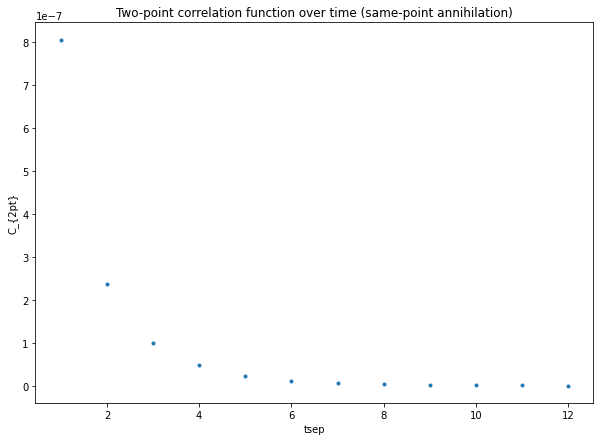

<Figure size 432x288 with 0 Axes>

In [7]:
# Plot the 2-point correlation: same-point only
x_2pt = np.array([i for i in range (1, 13)])
y_2pt = np.array([gv_avg_data['2pt_SS'][i].mean for i in range (1, 13)])
y_2pt_err = np.array([gv_avg_data['2pt_SS'][i].sdev for i in range (1, 13)])

h5data_methods.raw_data_plot("Two-point correlation function over time (same-point annihilation)", "tsep", "C_{2pt}", x_2pt, y_2pt, yerror=y_2pt_err)

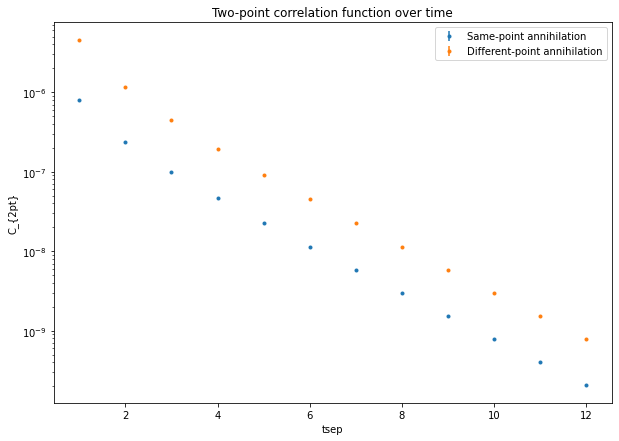

<Figure size 432x288 with 0 Axes>

In [8]:
# Plot the 2-point correlation: log plot

x_2pt = np.array([[i for i in range (1, 13)], [i for i in range (1, 13)]])
y_2pt = np.array([[gv_avg_data['2pt_SS'][i].mean for i in range (1, 13)], [gv_avg_data['2pt_PS'][i].mean for i in range (1, 13)]])
y_2pt_err = np.array([[gv_avg_data['2pt_SS'][i].sdev for i in range (1, 13)], [gv_avg_data['2pt_PS'][i].sdev for i in range (1, 13)]])

l = np.array(["Same-point annihilation", "Different-point annihilation"])

h5data_methods.raw_data_plot("Two-point correlation function over time", "tsep", "C_{2pt}", x_2pt, y_2pt, nplots=2, yerror=y_2pt_err, legendlabels=l, logy=True)



<ipython-input-9-b8e51a1fe171>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_3pt = np.array([np.array([j - (i+3)/2. for j in range(1, i+tsep_vals[0])]) for i in range(len(tsep_vals))])
<ipython-input-9-b8e51a1fe171>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y_3pt = np.array([ np.array([gv_avg_data['C_ratio'][i][j].mean for j in range(len(gv_avg_data['C_ratio'][i]))]) for i in range(len(tsep_vals))])
<ipython-input-9-b8e51a1fe171>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of list

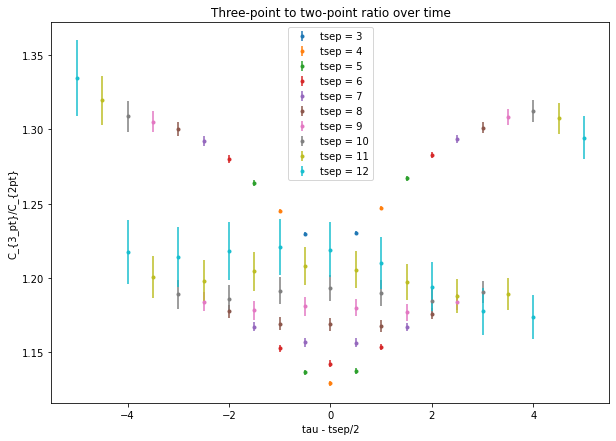

<Figure size 432x288 with 0 Axes>

In [9]:
# 3-point to 2-point ratio plots
x_3pt = np.array([np.array([j - (i+3)/2. for j in range(1, i+tsep_vals[0])]) for i in range(len(tsep_vals))])
y_3pt = np.array([ np.array([gv_avg_data['C_ratio'][i][j].mean for j in range(len(gv_avg_data['C_ratio'][i]))]) for i in range(len(tsep_vals))])
y_3pt_err = np.array([ np.array([gv_avg_data['C_ratio'][i][j].sdev for j in range(len(gv_avg_data['C_ratio'][i]))]) for i in range(len(tsep_vals))])

#for j in range(len(gv_avg_data['C_ratio'][i]))

legendlabels = np.array(["tsep = {}".format(i) for i in tsep_vals])

h5data_methods.raw_data_plot("Three-point to two-point ratio over time", "tau - tsep/2", 'C_{3_pt}/C_{2pt}', x_3pt, y_3pt, nplots = len(gv_avg_data['C_ratio']), yerror=y_3pt_err, legendlabels=legendlabels)


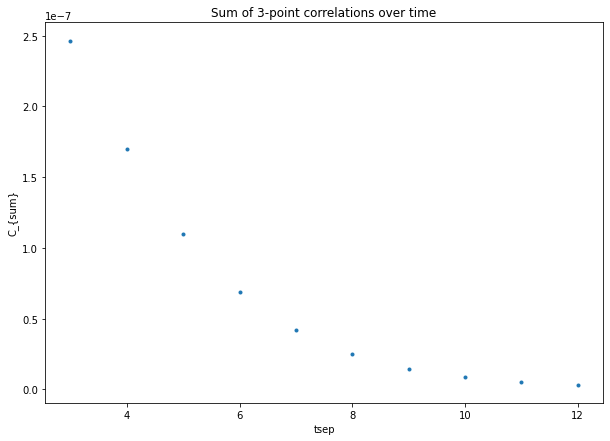

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot Csum
x_Csum = np.array([i for i in tsep_vals ])
y_Csum = np.array([gv_avg_data['Csum'][i].mean for i in range(len(tsep_vals))])
y_Csum_err = np.array([gv_avg_data['Csum'][i].sdev for i in range(len(tsep_vals))])

h5data_methods.raw_data_plot("Sum of 3-point correlations over time", "tsep", "C_{sum}", x_Csum, y_Csum, yerror=y_Csum_err)


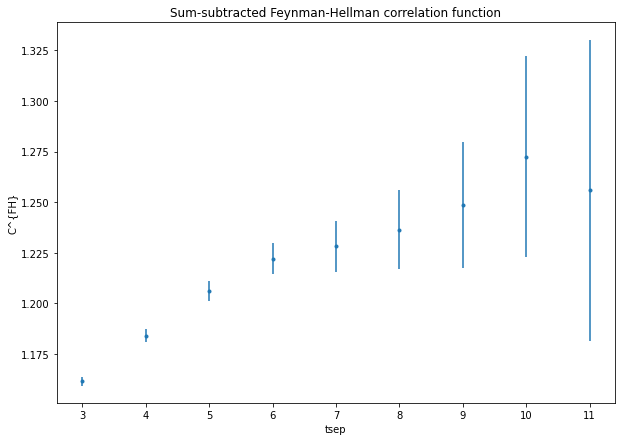

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot Feynman-Hellman
x_CFH = np.array([i for i in tsep_vals[:-1] ])
y_CFH = np.array([gv_avg_data['C^FH'][i].mean for i in range(len(tsep_vals)-1)])
y_CFH_err = np.array([gv_avg_data['C^FH'][i].sdev for i in range(len(tsep_vals)-1)])

h5data_methods.raw_data_plot("Sum-subtracted Feynman-Hellman correlation function", "tsep", "C^{FH}", x_CFH, y_CFH, yerror=y_CFH_err)



In [12]:
# the 3-point correlation function
# Precondition: t is a 1-D numpy array of 2-element array like objects t[i] = (t_sep, tau)
num_zs = 1
def C_3pt(t, p):
    #tsep = np.array([np.array([t[i][j][0] for j in range(len(t[i]))]) for i in range(len(t))])
    #tau = np.array([np.array([t[i][j][1] for j in range(len(t[i]))]) for i in range(len(t))])
    tsep, tau = np.transpose(t)
    print("tsep: ", tsep)
    print("tau: ", tau)
    
    result = np.array([gv.gvar(0,0) for i in range(len(tsep))])
    for n in range(num_zs):
        for m in range(num_zs):
            En = Ei(n, p)
            Em = Ei(m, p)
            result += p['Z{}'.format(n)]*p['gA3_{0}{1}'.format(n, m)]*p['Z{}'.format(m)]*np.exp(-En*tsep)*np.exp(-(Em - En)*tau)
            # print out the dictionary indices which are called in this summation
            #print("n = ", n, "; m = ", m)
            #print('Z{}'.format(n), "*", 'gA3_{0}{1}'.format(n, m), "*", 'Z{}'.format(m), "*e^(-tsep*", "E{}".format(n), ")*e^(-tau*(", "E{}".format(m), "-", "E{}".format(n), ")")
            
    return result

In [13]:
# In order to be able to work with our 2-d array based functions, we need a way to convert from 2-d array to 1-d arrays and from 1-d arrays to 2-d arrays
# For the independent (time) variable, I'd just set up a 2-d array and a 1-d array with all the data I need
# For the dependent (correlation function) variable, I'd use the time variable arrays to call the correct indices to assign the variables in the conversion
t_2d_array = np.array([np.array([(i+3, j) for j in range(1, i+tsep_vals[0])]) for i in range(len(tsep_vals))])

num_elements = np.sum(np.array([i+tsep_vals[0] - 1 for i in range(len(tsep_vals))]))
tsep_t = np.zeros(num_elements)
tau_t = np.zeros(num_elements)

k = 0
for i in range(len(tsep_vals)):
    for j in range(1, i+tsep_vals[0]):
        tsep_t[k] = i + tsep_vals[0]
        tau_t[k] = j
        #print("k = ", k, " tsep = ", tsep_t[k], " tau = ", tau_t[k])
        k += 1

        
t_1d_array = np.transpose(np.array([tsep_t, tau_t])) 


# Universal precondition for the below functions: x_1d, x_2d, y_1d, and y_2d, in the end, must have the 
# same number of elements. Also, x_1d and y_1d have to have the same dimensions, as must x_2d and y_2d
def convert_1dto2d(x_1d, x_2d, y_1d):
    y_2d = np.array([np.array([None for j in range(len(x_2d[i]))]) for i in range(len(x_2d))])
    i = 0
    j = 0
    for k in range(len(x_1d)):
        y_2d[i][j] = y_1d[k]
        j += 1
        if j >= len(x_2d[i]):
            i +=1
            j = 0
            
    return y_2d

def convert_2dto1d(x_1d, x_2d, y_2d):
    y_1d = np.array([None for k in range(len(x_1d))])
    k = 0
    for i in range(len(x_2d)):
        for j in range(len(x_2d[i])):
            y_1d[k] = y_2d[i][j]
            k += 1
    
    return y_1d
    
#print(np.shape(t_2d_array))
#print(np.shape(t_1d_array))

<ipython-input-13-dc7dad366598>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  t_2d_array = np.array([np.array([(i+3, j) for j in range(1, i+tsep_vals[0])]) for i in range(len(tsep_vals))])


In [14]:
# In order to test, set priors
num_zs = 6


priors = gv.BufferDict()
for n in range(num_zs):
    for m in range(num_zs):
        priors['gA3_{0}{1}'.format(n, m)] = gv.gvar(1, 2)
    
priors['gA3_00'] = gv.gvar(1.25, 0.15) # Prior the ground state on the 3-point-to-2-point ratios

priors['E0'] = gv.gvar(0.665, 0.015)
priors['Z0'] = gv.gvar(0.0008, 0.0003)
priors['Ztilde0'] = gv.gvar(0.003, 0.002)

# Use constant dE to prior the energies
dE0 = 2*mpi
energyvals = np.array([None]*num_zs)
dEvals = np.array([None]*(num_zs - 1))

E0_errbar = 0.8
energyvals[0] = priors['E0'].mean
for k in range(1, num_zs):
    dEvals[k-1] = dE0
    energyvals[k] = energyvals[k-1] + dEvals[k-1]
        

for k in range(1, num_zs):
            
    err_ratio = energyvals[k]/(energyvals[k] - (E0_errbar * dEvals[k-1]) )
            
    priors['Z{}'.format(k)] = gv.gvar(0.0008, 0.0004)
    priors['Ztilde{}'.format(k)] = gv.gvar(0, 0.005)
    priors['log(dE{})'.format(k-1)] = gv.gvar(np.log(dEvals[k-1]), 0.7)

In [15]:
# Set some t-vals, then test
num_zs = 6

#print(np.shape(test_t))
#print(test_t)
#for i in range(len(tsep_vals)):
    #for j in range(1, i+tsep_vals[0]):
        #test_t[i][j-1][0] = i+tsep_vals[0]
        #test_t[i][j-1][1] = j


        
#print(test_t)
#print(test_t[0][0][0])
test_C = C_3pt(t_1d_array, priors)

tsep:  [ 3.  3.  4.  4.  4.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.
  7.  7.  8.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.  9.  9.  9. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
tau:  [ 1.  2.  1.  2.  3.  1.  2.  3.  4.  1.  2.  3.  4.  5.  1.  2.  3.  4.
  5.  6.  1.  2.  3.  4.  5.  6.  7.  1.  2.  3.  4.  5.  6.  7.  8.  1.
  2.  3.  4.  5.  6.  7.  8.  9.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
0.665(15)
0.665(15)
0.665(15)
1.04(26)
0.665(15)
1.42(37)
0.665(15)
1.80(46)
0.665(15)
2.17(53)
0.665(15)
2.55(59)
1.04(26)
0.665(15)
1.04(26)
1.04(26)
1.04(26)
1.42(37)
1.04(26)
1.80(46)
1.04(26)
2.17(53)
1.04(26)
2.55(59)
1.42(37)
0.665(15)
1.42(37)
1.04(26)
1.42(37)
1.42(37)
1.42(37)
1.80(46)
1.42(37)
2.17(53)
1.42(37)
2.55(59)
1.80(46)
0.665(15)
1.80(46)
1.04(26)
1.80(46)
1.42(37)
1.80(46)
1.80(46)
1.80(46)
2.17(53)
1.80(46)
2.55(59)
2.17(53)
0.665(

<ipython-input-16-a554c21a2219>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y_3pt_mean = np.array([[gv_avg_data['3pt'][i][j].mean for j in range(1, i+tsep_vals[0])] for i in range(len(tsep_vals))])
<ipython-input-16-a554c21a2219>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y_3pt_sdev = np.array([[gv_avg_data['3pt'][i][j].sdev for j in range(1, i+tsep_vals[0])] for i in range(len(tsep_vals))])
<ipython-input-13-dc7dad366598>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

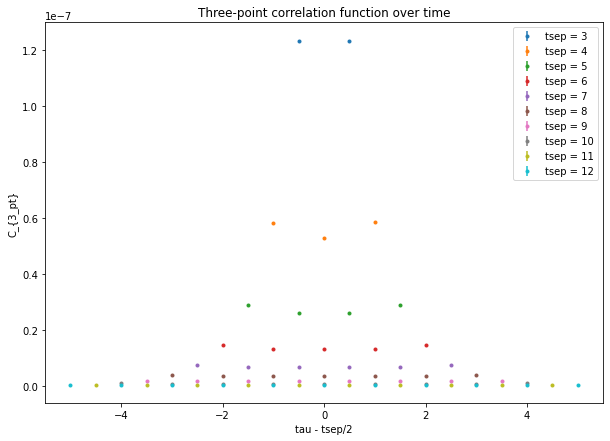

<Figure size 432x288 with 0 Axes>

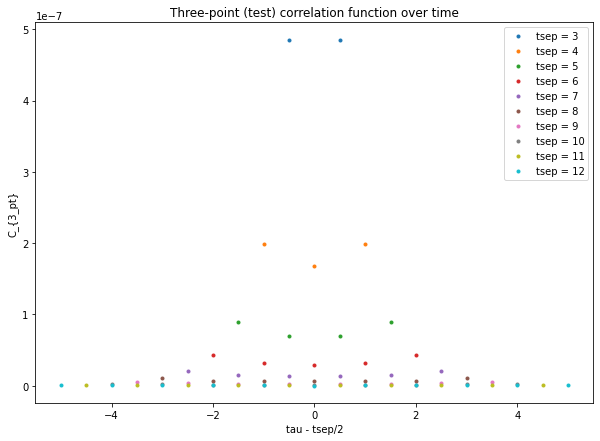

<Figure size 432x288 with 0 Axes>

In [16]:
y_3pt_mean = np.array([[gv_avg_data['3pt'][i][j].mean for j in range(1, i+tsep_vals[0])] for i in range(len(tsep_vals))])
y_3pt_sdev = np.array([[gv_avg_data['3pt'][i][j].sdev for j in range(1, i+tsep_vals[0])] for i in range(len(tsep_vals))])

y_test = convert_1dto2d(t_1d_array, t_2d_array, test_C)
y_test_mean = np.array([[y_test[i][j-1].mean for j in range(1, i+tsep_vals[0])] for i in range(len(tsep_vals))])
y_test_sdev = np.array([[y_test[i][j-1].sdev for j in range(1, i+tsep_vals[0])] for i in range(len(tsep_vals))])


h5data_methods.raw_data_plot("Three-point correlation function over time", "tau - tsep/2", 'C_{3_pt}', x_3pt, y_3pt_mean, nplots = len(gv_avg_data['C_ratio']), yerror=y_3pt_sdev, legendlabels=legendlabels) #ylim = (0, 1e-07),
h5data_methods.raw_data_plot("Three-point (test) correlation function over time", "tau - tsep/2", 'C_{3_pt}', x_3pt, y_test_mean, nplots = len(gv_avg_data['C_ratio']), legendlabels=legendlabels) #ylim = (0, 1e-07),


In [17]:
# test the ratio-finder
print(y_test)
print(test_C)

[array([4.9(3.8)e-07, 4.9(3.8)e-07], dtype=object)
 array([2.0(1.6)e-07, 1.7(1.4)e-07, 2.0(1.6)e-07], dtype=object)
 array([9.0(7.4)e-08, 6.9(5.9)e-08, 6.9(5.9)e-08, 9.0(7.4)e-08],
      dtype=object)
 array([4.3(3.6)e-08, 3.1(2.7)e-08, 2.9(2.5)e-08, 3.1(2.7)e-08,
       4.3(3.6)e-08], dtype=object)
 array([2.1(1.8)e-08, 1.5(1.3)e-08, 1.3(1.1)e-08, 1.3(1.1)e-08,
       1.5(1.3)e-08, 2.1(1.8)e-08], dtype=object)
 array([1.04(88)e-08, 7.3(6.2)e-09, 6.2(5.3)e-09, 5.9(5.0)e-09,
       6.2(5.3)e-09, 7.3(6.2)e-09, 1.04(88)e-08], dtype=object)
 array([5.2(4.4)e-09, 3.6(3.1)e-09, 3.1(2.6)e-09, 2.8(2.3)e-09,
       2.8(2.3)e-09, 3.1(2.6)e-09, 3.6(3.1)e-09, 5.2(4.4)e-09],
      dtype=object)
 array([2.7(2.3)e-09, 1.8(1.6)e-09, 1.5(1.3)e-09, 1.4(1.1)e-09,
       1.4(1.1)e-09, 1.4(1.1)e-09, 1.5(1.3)e-09, 1.8(1.6)e-09,
       2.7(2.3)e-09], dtype=object)
 array([1.3(1.2)e-09, 9.3(7.9)e-10, 7.7(6.4)e-10, 7.0(5.7)e-10,
       6.7(5.4)e-10, 6.7(5.4)e-10, 7.0(5.7)e-10, 7.7(6.4)e-10,
       9.3(7.9)e-10

In [18]:
# The Feynman-Hellman fit-function
# t is a numpy array of tsep times

def C_2pt_SS(t, p):
    
    z = np.array([])
    E = np.array([])
    for i in range(num_zs):
        z = np.append(z, p['Z{}'.format(i)])
        E = np.append(E, Ei(i, p))
        
    
    sum_ss = sum([z[i]*z[i]*np.exp(-E[i]*t) for i in range(num_zs)])
    
    return np.array(sum_ss)


num_zs = 1
def Csum(t, p):
    result = 0
    for n in range(num_zs):
        print("n = ", n)
        En = Ei(n, p)
        
        result += (t - 1) * p['Z{}'.format(n)]*p['gA3_{0}{1}'.format(n, n)]*p['Z{}'.format(n)]*np.exp(-En*t)
        for m in range(num_zs):
            if n == m:
                continue
            else:
                print("m = ", m)
                Em = Ei(m, p)
                
                e_Delta_nm = np.exp((En - Em)/2.)
                e_Delta_mn = np.exp((Em - En)/2.)
                
                mn_ratio = (e_Delta_nm*np.exp(-En*t) - e_Delta_mn*np.exp(-Em*t))/(e_Delta_mn - e_Delta_nm)
                
                result += p['Z{}'.format(n)]*p['gA3_{0}{1}'.format(n, m)]*p['Z{}'.format(m)]*mn_ratio
                
    return result

def C_FH(t, p):
    return (Csum(t + 1, p)/C_2pt_SS(t + 1, p)) - (Csum(t, p)/C_2pt_SS(t, p))

n =  0
0.665(15)
0.665(15)
n =  0
0.665(15)
0.665(15)
(10,)


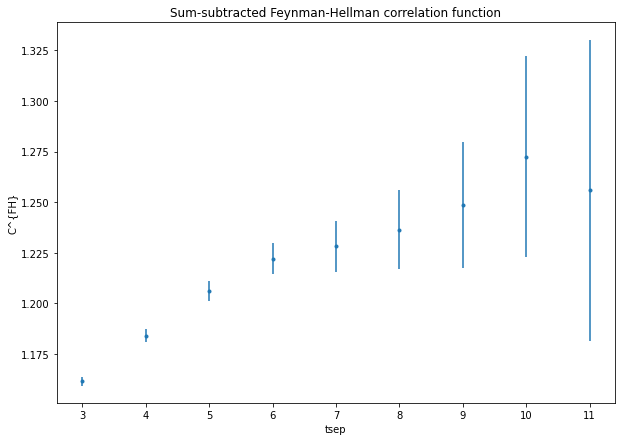

<Figure size 432x288 with 0 Axes>

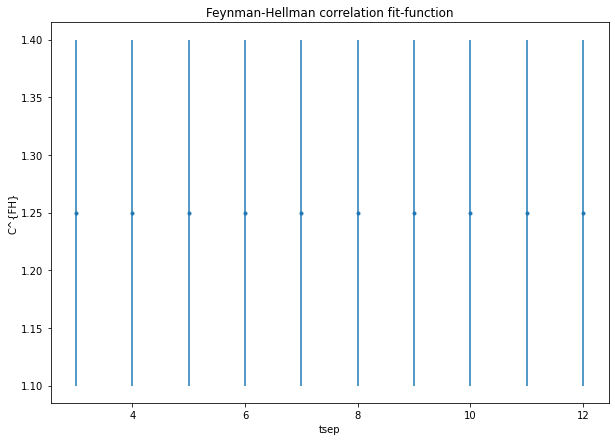

<Figure size 432x288 with 0 Axes>

In [19]:
# Test the Feynman-Hellman function with the priors that exist
C_FH_test = C_FH(tsep_vals, priors)
print(np.shape(C_FH_test))
y_C_FH_mean = np.array([C_FH_test[i].mean for i in range(len(C_FH_test))])
y_C_FH_sdev = np.array([C_FH_test[i].sdev for i in range(len(C_FH_test))])

h5data_methods.raw_data_plot("Sum-subtracted Feynman-Hellman correlation function", "tsep", "C^{FH}", x_CFH, y_CFH, yerror=y_CFH_err)
h5data_methods.raw_data_plot("Feynman-Hellman correlation fit-function", "tsep", "C^{FH}", tsep_vals, y_C_FH_mean, yerror=y_C_FH_sdev)

In [20]:
# Now that the test was successful, reset the priors for gnm back to 0 +/- 1
for n in range(num_zs):
    for m in range(num_zs):
        priors['gA3_{0}{1}'.format(n, m)] = gv.gvar(0, 2)
    
priors['gA3_00'] = gv.gvar(1.25, 0.15) # Prior the ground state on the 3-point-to-2-point ratios



In [21]:
C_FH_test

array([1.25(15), 1.25(15), 1.25(15), 1.25(15), 1.25(15), 1.25(15),
       1.25(15), 1.25(15), 1.25(15), 1.25(15)], dtype=object)

In [22]:
gv_avg_data['3pt']

array([[2.094(15)e-08, 1.2314(44)e-07, 1.2324(44)e-07, 2.119(12)e-08,
        -3.763(13)e-08, -1.3368(67)e-08, -5.687(49)e-09, -2.529(40)e-09,
        -1.162(36)e-09, -5.53(32)e-10, -2.80(28)e-10, -1.51(26)e-10,
        -8.7(2.4)e-11, -5.6(2.3)e-11, -4.0(2.3)e-11, -2.8(2.3)e-11,
        -1.6(2.4)e-11, -9(24)e-12, -4(26)e-12, -2.0(1.7)e-11,
        -2.7(1.4)e-11, -1.3(1.1)e-11, -6.9(9.6)e-12, -5.0(8.4)e-12,
        -5.0(7.5)e-12, -4.9(6.8)e-12, -3.7(6.3)e-12, -1.3(5.8)e-12,
        4(55)e-13, -1.1(5.5)e-12, -4.5(5.6)e-12, -7.3(6.0)e-12,
        -8.0(6.5)e-12, -6.8(7.2)e-12, -5.4(8.6)e-12, -1.11(66)e-11,
        -1.32(63)e-11, -8.4(6.0)e-12, -5.1(6.1)e-12, -2.2(6.3)e-12,
        -1(64)e-13, 1.4(6.6)e-12, 3.1(7.1)e-12, 2.2(7.9)e-12,
        -3.9(9.1)e-12, -1.2(1.1)e-11, -1.9(1.3)e-11, -2.5(1.6)e-11,
        -3.3(1.9)e-11, -4.4(2.3)e-11, -5.2(2.8)e-11, -2.2(2.5)e-11,
        1.3(2.5)e-11, 1.1(2.5)e-11, 1(26)e-12, -2.3(2.8)e-11,
        -7.5(2.9)e-11, -1.93(31)e-10, -4.64(33)e-10, -1.083(38

array([[2.094(15)e-08, 1.2314(44)e-07, 1.2324(44)e-07, 2.119(12)e-08,
        -3.763(13)e-08, -1.3368(67)e-08, -5.687(49)e-09, -2.529(40)e-09,
        -1.162(36)e-09, -5.53(32)e-10, -2.80(28)e-10, -1.51(26)e-10,
        -8.7(2.4)e-11, -5.6(2.3)e-11, -4.0(2.3)e-11, -2.8(2.3)e-11,
        -1.6(2.4)e-11, -9(24)e-12, -4(26)e-12, -2.0(1.7)e-11,
        -2.7(1.4)e-11, -1.3(1.1)e-11, -6.9(9.6)e-12, -5.0(8.4)e-12,
        -5.0(7.5)e-12, -4.9(6.8)e-12, -3.7(6.3)e-12, -1.3(5.8)e-12,
        4(55)e-13, -1.1(5.5)e-12, -4.5(5.6)e-12, -7.3(6.0)e-12,
        -8.0(6.5)e-12, -6.8(7.2)e-12, -5.4(8.6)e-12, -1.11(66)e-11,
        -1.32(63)e-11, -8.4(6.0)e-12, -5.1(6.1)e-12, -2.2(6.3)e-12,
        -1(64)e-13, 1.4(6.6)e-12, 3.1(7.1)e-12, 2.2(7.9)e-12,
        -3.9(9.1)e-12, -1.2(1.1)e-11, -1.9(1.3)e-11, -2.5(1.6)e-11,
        -3.3(1.9)e-11, -4.4(2.3)e-11, -5.2(2.8)e-11, -2.2(2.5)e-11,
        1.3(2.5)e-11, 1.1(2.5)e-11, 1(26)e-12, -2.3(2.8)e-11,
        -7.5(2.9)e-11, -1.93(31)e-10, -4.64(33)e-10, -1.083(38)e-09,
        -2.479(44)e-09, -5.697(55)e-09, -1.3470(74)e-08, -3.783(13)e-08],
       [1.1262(82)e-08, 5.835(21)e-08, 5.292(19)e-08, 5.845(21)e-08,
        1.1396(64)e-08, -1.7341(68)e-08, -6.171(38)e-09, -2.644(29)e-09,
        -1.181(24)e-09, -5.45(21)e-10, -2.62(19)e-10, -1.32(17)e-10,
        -6.8(1.6)e-11, -3.8(1.5)e-11, -2.4(1.5)e-11, -1.7(1.5)e-11,
        -1.2(1.5)e-11, -8(15)e-12, -5(15)e-12, 2(16)e-12, -7(10)e-12,
        -1.18(86)e-11, -5.2(6.9)e-12, -3.2(5.9)e-12, -2.8(5.2)e-12,
        -2.5(4.6)e-12, -1.8(4.2)e-12, -1(39)e-13, 1.3(3.6)e-12,
        6(35)e-13, -1.7(3.6)e-12, -4.0(3.7)e-12, -4.7(3.9)e-12,
        -3.4(4.3)e-12, -1.9(4.9)e-12, -5(57)e-13, -2.8(4.6)e-12,
        -4.5(4.5)e-12, -8(44)e-13, 1.6(4.4)e-12, 2.9(4.5)e-12,
        3.8(4.5)e-12, 4.9(4.8)e-12, 4.3(5.2)e-12, 2(60)e-13,
        -5.5(7.0)e-12, -9.9(8.2)e-12, -1.38(98)e-11, -1.8(1.2)e-11,
        -2.3(1.4)e-11, -2.7(1.6)e-11, -3.3(2.0)e-11, -1.4(1.8)e-11,
        1.4(1.8)e-11, 7(18)e-12, -8(19)e-12, -3.4(2.0)e-11,
        -8.9(2.1)e-11, -2.18(22)e-10, -5.13(25)e-10, -1.168(28)e-09,
        -2.657(34)e-09, -6.223(44)e-09, -1.7433(70)e-08],
       [5.988(47)e-09, 2.898(11)e-08, 2.6058(98)e-08, 2.6079(97)e-08,
        2.905(11)e-08, 6.049(38)e-09, -8.378(37)e-09, -2.981(22)e-09,
        -1.280(18)e-09, -5.72(15)e-10, -2.63(13)e-10, -1.25(12)e-10,
        -5.9(1.1)e-11, -2.9(1.0)e-11, -1.50(98)e-11, -9.8(9.7)e-12,
        -7.3(9.5)e-12, -5.6(9.3)e-12, -4.0(9.2)e-12, -6(91)e-13,
        5.0(9.7)e-12, -5(65)e-13, -5.0(5.5)e-12, -2.3(4.4)e-12,
        -1.9(3.8)e-12, -1.7(3.4)e-12, -1.3(3.0)e-12, -2(275)e-14,
        1.5(2.5)e-12, 1.7(2.4)e-12, 4(24)e-13, -1.2(2.5)e-12,
        -1.8(2.6)e-12, -1.0(2.8)e-12, -2(31)e-13, 4(35)e-13,
        2.2(4.1)e-12, 4(35)e-13, -2.0(3.4)e-12, 7(33)e-13, 2.3(3.3)e-12,
        3.4(3.3)e-12, 4.3(3.4)e-12, 3.9(3.6)e-12, 10(41)e-13,
        -3.0(4.7)e-12, -6.1(5.5)e-12, -8.4(6.4)e-12, -1.00(75)e-11,
        -1.16(87)e-11, -1.4(1.0)e-11, -1.7(1.2)e-11, -2.3(1.5)e-11,
        -7(14)e-12, 6(14)e-12, -7(14)e-12, -2.3(1.5)e-11, -5.1(1.5)e-11,
        -1.16(16)e-10, -2.64(17)e-10, -5.82(19)e-10, -1.297(22)e-09,
        -3.006(27)e-09, -8.406(40)e-09],
       [3.158(29)e-09, 1.4671(60)e-08, 1.3210(54)e-08, 1.3091(53)e-08,
        1.3223(54)e-08, 1.4701(60)e-08, 3.176(24)e-09, -4.147(21)e-09,
        -1.471(14)e-09, -6.28(12)e-10, -2.78(10)e-10, -1.251(88)e-10,
        -5.67(79)e-11, -2.56(72)e-11, -1.21(68)e-11, -7.4(6.6)e-12,
        -5.7(6.4)e-12, -5.0(6.2)e-12, -4.1(6.0)e-12, -2.2(6.0)e-12,
        4(60)e-13, 3.1(6.4)e-12, -6(43)e-13, -3.0(3.6)e-12,
        -2.0(2.9)e-12, -1.6(2.5)e-12, -1.2(2.3)e-12, -1(20)e-13,
        1.5(1.8)e-12, 2.1(1.7)e-12, 1.4(1.7)e-12, 2(17)e-13, -4(18)e-13,
        -5(19)e-13, -4(21)e-13, -5(23)e-13, 3(26)e-13, 2.2(3.1)e-12,
        2(28)e-13, -1.5(2.7)e-12, 9(26)e-13, 2.2(2.5)e-12, 3.0(2.5)e-12,
        2.7(2.7)e-12, 5(29)e-13, -2.3(3.3)e-12, -4.5(3.8)e-12,
        -5.7(4.4)e-12, -6.2(5.1)e-12, -6.5(5.9)e-12, -6.9(6.9)e-12,
        -8.9(8.1)e-12, -1.19(95)e-11, -1.4(1.2)e-11, -5(11)e-12,
        -2(11)e-12, -1.4(1.1)e-11, -3.0(1.2)e-11, -6.5(1.2)e-11,
        -1.40(12)e-10, -2.96(13)e-10, -6.48(15)e-10, -1.488(18)e-09,
        -4.155(25)e-09],
       [1.656(19)e-09, 7.493(35)e-09, 6.769(31)e-09, 6.707(31)e-09,
        6.706(31)e-09, 6.767(32)e-09, 7.499(35)e-09, 1.661(15)e-09,
        -2.078(14)e-09, -7.312(96)e-10, -3.095(80)e-10, -1.353(67)e-10,
        -6.02(59)e-11, -2.67(53)e-11, -1.24(49)e-11, -7.1(4.7)e-12,
        -4.8(4.4)e-12, -3.7(4.3)e-12, -3.2(4.1)e-12, -2.6(4.1)e-12,
        -1.5(4.1)e-12, -2(41)e-13, 1.1(4.3)e-12, -9(29)e-13,
        -2.2(2.5)e-12, -1.2(2.0)e-12, -10(17)e-13, -3(15)e-13,
        1.1(1.4)e-12, 1.8(1.3)e-12, 1.4(1.2)e-12, 5(12)e-13, -1(12)e-13,
        -5(13)e-13, -7(14)e-13, -10(16)e-13, -7(18)e-13, 2(21)e-13,
        1.8(2.5)e-12, 7(22)e-13, 3(209)e-14, 1.3(2.0)e-12, 1.7(2.0)e-12,
        1.2(2.1)e-12, -4(23)e-13, -2.2(2.5)e-12, -3.6(2.8)e-12,
        -4.4(3.1)e-12, -4.8(3.6)e-12, -5.1(4.2)e-12, -5.1(4.8)e-12,
        -6.3(5.7)e-12, -8.3(6.6)e-12, -8.3(7.7)e-12, -9.8(9.5)e-12,
        -5.3(8.7)e-12, -9.2(9.0)e-12, -1.90(90)e-11, -3.74(91)e-11,
        -7.51(93)e-11, -1.508(99)e-10, -3.24(11)e-10, -7.45(13)e-10,
        -2.083(17)e-09],
       [8.63(13)e-10, 3.847(22)e-09, 3.484(20)e-09, 3.459(19)e-09,
        3.457(19)e-09, 3.455(19)e-09, 3.479(20)e-09, 3.849(22)e-09,
        8.72(10)e-10, -1.0476(91)e-09, -3.668(66)e-10, -1.556(54)e-10,
        -6.85(46)e-11, -3.05(41)e-11, -1.41(37)e-11, -7.5(3.4)e-12,
        -4.2(3.2)e-12, -2.6(3.1)e-12, -2.1(2.9)e-12, -1.8(2.9)e-12,
        -1.3(2.9)e-12, -6(29)e-13, 2(29)e-13, 1.3(3.0)e-12, 3(21)e-13,
        -7(17)e-13, -4(14)e-13, -7(124)e-14, 7(11)e-13, 1.2(1.0)e-12,
        9.3(9.3)e-13, 2.5(9.0)e-13, -2.4(9.0)e-13, -4.9(9.3)e-13,
        -6(10)e-13, -8(11)e-13, -6(12)e-13, 5(1426)e-15, 9(16)e-13,
        2.3(2.0)e-12, 1.4(1.7)e-12, 3(17)e-13, 5(17)e-13, -2(17)e-13,
        -1.4(1.8)e-12, -2.2(1.9)e-12, -2.8(2.1)e-12, -3.1(2.3)e-12,
        -3.1(2.7)e-12, -3.2(3.1)e-12, -2.7(3.5)e-12, -3.1(4.0)e-12,
        -4.3(4.7)e-12, -3.8(5.4)e-12, -3.4(6.3)e-12, -4.6(7.8)e-12,
        -5.9(7.3)e-12, -1.34(75)e-11, -2.23(74)e-11, -4.03(76)e-11,
        -7.59(80)e-11, -1.614(86)e-10, -3.749(96)e-10, -1.057(12)e-09],
       [4.465(98)e-10, 1.981(15)e-09, 1.797(13)e-09, 1.788(12)e-09,
        1.792(12)e-09, 1.791(12)e-09, 1.786(12)e-09, 1.797(13)e-09,
        1.986(14)e-09, 4.579(71)e-10, -5.337(62)e-10, -1.875(46)e-10,
        -7.98(38)e-11, -3.47(33)e-11, -1.54(29)e-11, -7.3(2.7)e-12,
        -3.6(2.4)e-12, -2.0(2.3)e-12, -1.2(2.2)e-12, -7(21)e-13,
        -1(20)e-13, 4(20)e-13, 7(20)e-13, 1.3(2.0)e-12, 2.3(2.2)e-12,
        1.5(1.5)e-12, -3(12)e-13, -10(104)e-14, 3.3(9.1)e-13,
        5.8(8.1)e-13, 3.6(7.5)e-13, -2(71)e-14, -2.8(6.9)e-13,
        -3.6(6.9)e-13, -3.6(7.2)e-13, -3.7(7.8)e-13, -1.5(8.7)e-13,
        4(10)e-13, 1.0(1.1)e-12, 1.7(1.3)e-12, 2.2(1.7)e-12, 8(15)e-13,
        -5(15)e-13, -10(15)e-13, -1.9(1.5)e-12, -2.2(1.6)e-12,
        -2.4(1.7)e-12, -2.2(1.8)e-12, -1.9(2.0)e-12, -1.8(2.3)e-12,
        -1.0(2.6)e-12, -9(30)e-13, -1.5(3.4)e-12, -7(39)e-13,
        -4(458)e-14, -10(54)e-13, -1.9(6.8)e-12, -4.7(6.5)e-12,
        -1.41(65)e-11, -2.26(65)e-11, -4.00(68)e-11, -8.22(71)e-11,
        -1.917(76)e-10, -5.433(89)e-10],
       [2.297(77)e-10, 1.021(10)e-09, 9.277(90)e-10, 9.253(85)e-10,
        9.297(82)e-10, 9.313(81)e-10, 9.285(81)e-10, 9.244(82)e-10,
        9.290(84)e-10, 1.0242(92)e-09, 2.362(49)e-10, -2.749(43)e-10,
        -9.64(32)e-11, -4.05(27)e-11, -1.77(24)e-11, -8.3(2.1)e-12,
        -4.1(1.9)e-12, -2.1(1.7)e-12, -10(16)e-13, 1(1510)e-15,
        9(15)e-13, 1.3(1.4)e-12, 1.5(1.4)e-12, 1.6(1.4)e-12,
        1.7(1.5)e-12, 1.9(1.6)e-12, 7(11)e-13, -3.2(9.3)e-13, -2(77)e-14,
        1.1(6.7)e-13, 2(62)e-14, -7(58)e-14, -1.3(5.5)e-13,
        -1.1(5.3)e-13, -7(54)e-14, -8(57)e-14, 8(64)e-14, 4.4(7.3)e-13,
        8.6(8.3)e-13, 1.24(97)e-12, 1.3(1.1)e-12, 1.1(1.4)e-12,
        -4(13)e-13, -1.7(1.3)e-12, -2.2(1.3)e-12, -2.1(1.3)e-12,
        -1.9(1.4)e-12, -1.5(1.4)e-12, -1.0(1.5)e-12, -8(17)e-13,
        -2(196)e-14, 4(22)e-13, 2(25)e-13, 8(29)e-13, 1.0(3.4)e-12,
        -4(40)e-13, -2.3(4.8)e-12, -1.7(6.1)e-12, -6.7(5.8)e-12,
        -1.66(57)e-11, -2.52(57)e-11, -4.59(59)e-11, -1.017(62)e-10,
        -2.828(70)e-10],
       [1.205(62)e-10, 5.303(78)e-10, 4.825(65)e-10, 4.816(60)e-10,
        4.841(58)e-10, 4.856(56)e-10, 4.845(55)e-10, 4.811(55)e-10,
        4.775(56)e-10, 4.778(57)e-10, 5.255(62)e-10, 1.197(34)e-10,
        -1.434(31)e-10, -5.10(23)e-11, -2.26(20)e-11, -1.11(17)e-11,
        -6.0(1.5)e-12, -3.4(1.4)e-12, -1.8(1.2)e-12, -4(11)e-13,
        7(11)e-13, 1.2(1.1)e-12, 1.3(1.1)e-12, 1.3(1.0)e-12,
        1.1(1.0)e-12, 8(11)e-13, 2(12)e-13, -4.1(8.2)e-13, -2.5(7.0)e-13,
        -1.3(5.8)e-13, -1.2(5.3)e-13, -3(482)e-15, 7(44)e-14,
        1.2(4.3)e-13, 1.3(4.3)e-13, 10(45)e-14, 1.6(4.9)e-13,
        3.5(5.5)e-13, 5.5(6.2)e-13, 6.8(7.2)e-13, 5.5(8.4)e-13,
        1.1(9.9)e-13, -5(12)e-13, -1.7(1.1)e-12, -2.4(1.1)e-12,
        -2.3(1.1)e-12, -1.9(1.1)e-12, -1.2(1.2)e-12, -5(12)e-13,
        -1(13)e-13, 5(15)e-13, 9(17)e-13, 9(19)e-13, 10(22)e-13,
        6(25)e-13, -1.2(3.0)e-12, -3.4(3.6)e-12, -3.9(4.3)e-12,
        -4.1(5.4)e-12, -9.5(5.1)e-12, -1.75(50)e-11, -2.68(50)e-11,
        -5.46(52)e-11, -1.472(57)e-10],
       [6.44(51)e-11, 2.759(59)e-10, 2.517(49)e-10, 2.510(44)e-10,
        2.518(42)e-10, 2.524(40)e-10, 2.520(39)e-10, 2.501(38)e-10,
        2.469(38)e-10, 2.434(39)e-10, 2.426(39)e-10, 2.676(43)e-10,
        5.87(25)e-11, -7.66(22)e-11, -2.90(17)e-11, -1.41(15)e-11,
        -7.6(1.3)e-12, -4.2(1.1)e-12, -2.2(1.0)e-12, -7.9(8.9)e-13,
        2.4(8.4)e-13, 6.7(8.1)e-13, 7.3(7.9)e-13, 7.1(7.7)e-13,
        5.4(7.6)e-13, 1.5(7.7)e-13, -4.6(7.9)e-13, -8.7(8.6)e-13,
        -8.1(6.1)e-13, -4.0(5.4)e-13, -4.1(4.6)e-13, -2.3(4.1)e-13,
        -5(37)e-14, 8(35)e-14, 1.5(3.5)e-13, 1.4(3.6)e-13, 1.6(3.8)e-13,
        2.6(4.2)e-13, 3.4(4.7)e-13, 3.5(5.3)e-13, 1.6(6.2)e-13,
        -2.5(7.2)e-13, -8.2(8.6)e-13, -1.6(1.1)e-12, -2.42(98)e-12,
        -2.43(98)e-12, -2.07(96)e-12, -1.36(96)e-12, -6.5(9.9)e-13,
        -2(11)e-13, 10(118)e-14, 3(13)e-13, 3(15)e-13, 2(17)e-13,
        -3(19)e-13, -1.7(2.3)e-12, -3.2(2.7)e-12, -3.8(3.2)e-12,
        -4.4(3.8)e-12, -5.8(4.8)e-12, -8.7(4.5)e-12, -1.44(45)e-11,
        -2.81(45)e-11, -7.51(48)e-11]], dtype=object)